count only questions:
- missing bid-ask spreads
- zero volumes
- missing implied volas
- implied volas above threshold
- prices below no arbitrage bound
- 

always:
- divide in calls / puts (-> in the money and out of the money work differently)
- use several moneyness indicators

- the purpose of this script is to show how some properties of the data behave locally

In [1]:
using Gadfly
using Econometrics

In [2]:
@time include("../startup_script2.jl")

elapsed time: 0.582238636 seconds (53061456 bytes allocated, 16.68% gc time)
elapsed time: 54.914763468 seconds (5419744236 bytes allocated, 66.51% gc time)
elapsed time: 0.778126558 seconds (112671656 bytes allocated, 49.96% gc time)
elapsed time: 68.03256099 seconds (5419744236 bytes allocated, 72.53% gc time)
elapsed time: 136.52491433 seconds (14681473340 bytes allocated, 65.42% gc time)
elapsed time: 79.059006416 seconds (5419744236 bytes allocated, 76.73% gc time)
elapsed time: 86.551089618 seconds (5419744236 bytes allocated, 78.87% gc time)
elapsed time: 330.541551528 seconds (30275269824 bytes allocated, 70.05% gc time)


,Date,ID,IV
1,2006-07-03,c_20060721_4500,NA
2,2006-07-04,c_20060721_4500,NA
3,2006-07-05,c_20060721_4500,NA
4,2006-07-06,c_20060721_4500,NA
5,2006-07-07,c_20060721_4500,NA
6,2006-07-10,c_20060721_4500,NA


- still missing:
    - delta open interest
    - price inconsistencies: lower arbitrage bounds exceeded

In [3]:
locData = join(addObs, mnyness, on = [:Date, :ID]) |>
x -> join(x, impliedVolas, on = [:Date, :ID]) |>
x -> join(x, opts, on = :ID) |>
x -> join(x, cohortParams, on = [:Date, :Expiry])

head(locData)

,Date,ID,Bid,Ask,Volume,Open_Interest,AbsMny,SimpMny,InvMny,LogMny,LogFMny,SclMny,IV,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity
1,2006-07-03,c_20060721_4500,NA,NA,0,127,1212.6899999999996,1.2694866666666667,0.7877199708018465,0.23861261928480745,0.24016690632921436,1.0183556574518589,NA,2006-07-21,4500,true,0.0283102283088403,0.0549019607843137
2,2006-07-03,c_20060721_4600,NA,NA,0,235,1112.6899999999996,1.2418891304347826,0.8052248590418875,0.21663371256603217,0.21818799961043908,0.9245536445124007,NA,2006-07-21,4600,true,0.0283102283088403,0.0549019607843137
3,2006-07-03,c_20060721_4700,NA,NA,0,212,1012.6899999999996,1.2154659574468085,0.8227297472819285,0.19512750734506865,0.19668179438947556,0.8327690363775394,NA,2006-07-21,4700,true,0.0283102283088403,0.0549019607843137
4,2006-07-03,c_20060721_4800,NA,NA,0,2749,912.6899999999996,1.1901437499999998,0.8402346355219695,0.17407409814723615,0.17562838519164306,0.7429168800686095,NA,2006-07-21,4800,true,0.0283102283088403,0.0549019607843137
5,2006-07-03,c_20060721_4850,NA,NA,0,122,862.6899999999996,1.1778742268041236,0.84898707964199,0.1637113111116896,0.1652655981560965,0.6986903725341459,NA,2006-07-21,4850,true,0.0283102283088403,0.0549019607843137
6,2006-07-03,c_20060721_4900,NA,NA,0,413,812.6899999999996,1.1658551020408163,0.8577395237620106,0.1534548109445006,0.15500909798890752,0.6549174781993078,NA,2006-07-21,4900,true,0.0283102283088403,0.0549019607843137


- transform time to maturity:

In [4]:
days_to_mat = round(locData[:Time_to_Maturity]*255*(-1))
locData[:Days_to_Maturity] = days_to_mat

2025129-element DataArray{Float64,1}:
  -14.0
  -14.0
  -14.0
  -14.0
  -14.0
  -14.0
  -14.0
  -14.0
  -14.0
  -14.0
  -14.0
  -14.0
  -14.0
    ⋮  
 -252.0
 -252.0
 -252.0
 -252.0
 -252.0
 -252.0
 -252.0
 -252.0
 -252.0
 -252.0
 -252.0
 -252.0

In [14]:
xEdges = [0:0.15:6]
yEdges = Float64[-15000:500:9000]

xCol = :Time_to_Maturity
yCol = :AbsMny

function countObs(df::SubDataFrame)
    return size(df, 1)
end

countObs (generic function with 1 method)

In [ ]:
currPlot = Gadfly.plot(locData, x=xCol, y=yCol, Geom.hexbin(xbincount=50, ybincount=50),
Guide.xlabel("Time to maturity"), Guide.ylabel("moneyness"))

In [ ]:
currPlot = plotLocalProperties(locData, xCol, yCol, xEdges, yEdges, countObs)

In [ ]:
currPlot = plotLocalProperties(locData[locData[:IsCall], :], xCol, yCol, xEdges, yEdges, countObs)

In [ ]:
currPlot = plotLocalProperties(locData[!locData[:IsCall], :], xCol, yCol, xEdges, yEdges, countObs)

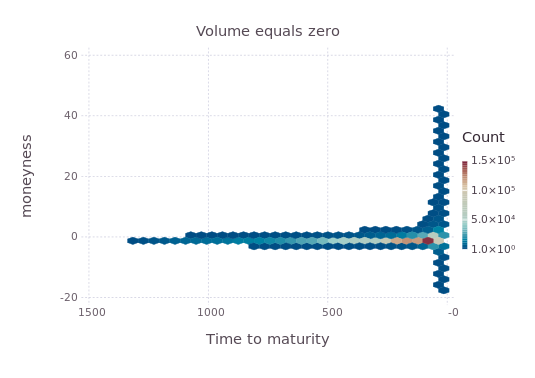

In [25]:
mnynessCol = :SclMny
ttmCol = :Days_to_Maturity

obsInd = locData[:Volume] .== 0
obsInd = convert(Array, obsInd, false)

smallData = locData[obsInd, [mnynessCol, ttmCol]]

currPlot = Gadfly.plot(smallData, x=ttmCol, y=mnynessCol, Geom.hexbin(xbincount=50, ybincount=50),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", -x), maxvalue = 0),
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Guide.xlabel("Time to maturity"), Guide.ylabel("moneyness"), Guide.title("Volume equals zero"))

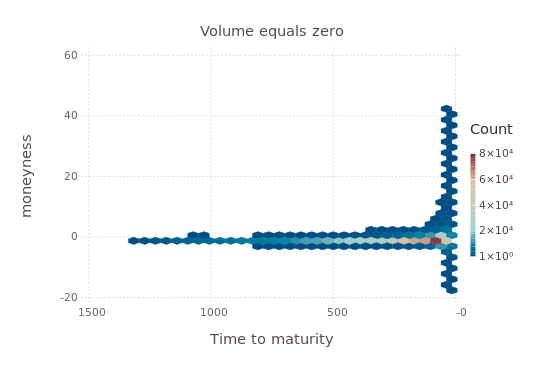

In [26]:
smallData = locData[obsInd, [mnynessCol, ttmCol, :IsCall]]
smallData = smallData[smallData[:IsCall], :]

currPlot = Gadfly.plot(smallData, x=ttmCol, y=mnynessCol, Geom.hexbin(xbincount=50, ybincount=50),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", -x), maxvalue = 0),
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Guide.xlabel("Time to maturity"), Guide.ylabel("moneyness"), Guide.title("Volume equals zero"))

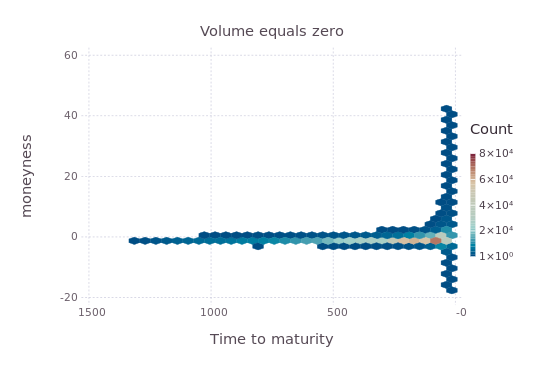

In [27]:
smallData = locData[obsInd, [mnynessCol, ttmCol, :IsCall]]
smallData = smallData[!smallData[:IsCall], :]

currPlot = Gadfly.plot(smallData, x=ttmCol, y=mnynessCol, Geom.hexbin(xbincount=50, ybincount=50),
Scale.x_continuous(labels=x -> @sprintf("%6.0f", -x), maxvalue = 0),
Scale.y_continuous(labels=x -> @sprintf("%6.0f", x)),
Guide.xlabel("Time to maturity"), Guide.ylabel("moneyness"), Guide.title("Volume equals zero"))

In [ ]:
draw(SVG("../pics/put_prices_below_bound.svg", 20cm, 14cm), currPlot)
draw(PDF("../pics/put_prices_below_bound.pdf", 20cm, 14cm), currPlot)

- define function to evaluate local properties

- where are observations?

In [39]:
xEdges = [0:0.5:6]
yEdges = Float64[-15000:500:9000]

xCol = :Time_to_Maturity
yCol = :AbsMny

function countObs(df::SubDataFrame)
    return size(df, 1)
end

countObs (generic function with 1 method)

In [31]:
using Gadfly

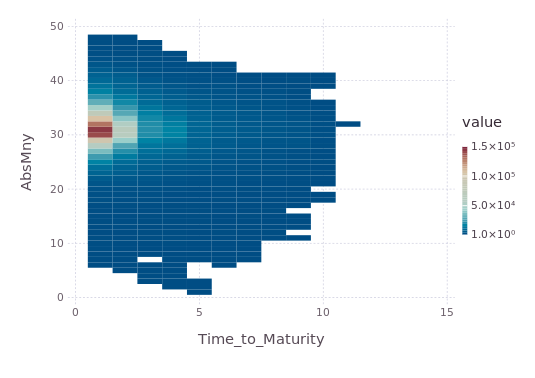

In [41]:
plot(res, x=xCol, y=yCol, color=:value, Geom.rectbin)

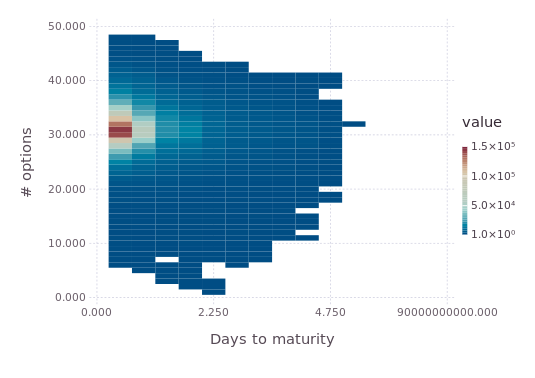

In [83]:
currPlot = Gadfly.plot(res, x=xCol, y=yCol, color=:value, Geom.rectbin,
Scale.x_continuous(labels=x -> @sprintf("%2.3f", xMidsFunc2(int(x))), minvalue=1, maxvalue=15),
Scale.y_continuous(labels=x -> @sprintf("%2.3f", x)),
Guide.xlabel("Days to maturity"),
Guide.ylabel("# options"))

In [33]:
eltypes(res)

3-element Array{Type{T<:Top},1}:
 Float64
 Float64
 Int64  

In [12]:
# Gadfly.plot(fullData, x="Time_to_Maturity", y="mnyness", Geom.hexbin(xbincount=100, ybincount=100))

In [14]:
# Gadfly.plot(fullData, x="Time_to_Maturity", y="mnyness", Geom.histogram2d)

In [15]:
# Gadfly.plot(fullData, x="Time_to_Maturity", y="mnyness", Stat.histogram2d(xbincount = 50, ybincount = 50), Geom.rectbin)